In [6]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

def create_spectrogram(data, sr, e, output_folder, audio_file_name):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    spectrogram_path = os.path.join(output_folder, 'spectrogram_{}_{}.png'.format(e, audio_file_name))
    plt.savefig(spectrogram_path)
    plt.close()


# Path to the folder containing audio files
audio_folder = r'C:\Users\christ\Downloads\Amirthavarshini Sentimental analysis\dataset'

# Path to the folder where you want to save the spectrograms and waveplots
output_folder = r'C:\Users\christ\Downloads\Amirthavarshini Sentimental analysis\dataset'

# Iterate through subfolders (emotions)
for emotion in os.listdir(audio_folder):
    emotion_path = os.path.join(audio_folder, emotion)

    if os.path.isdir(emotion_path):
        output_emotion_folder = os.path.join(output_folder, 'train_' + emotion)
        os.makedirs(output_emotion_folder, exist_ok=True)

        # Iterate through audio files in the emotion subfolder
        for audio_file in os.listdir(emotion_path):
            if audio_file.endswith('.wav'):
                audio_path = os.path.join(emotion_path, audio_file)
                data, sr = librosa.load(audio_path)

                # Generate unique image names based on the audio file's name
                audio_file_name = os.path.splitext(audio_file)[0]

                create_spectrogram(data, sr, emotion, output_emotion_folder, audio_file_name)

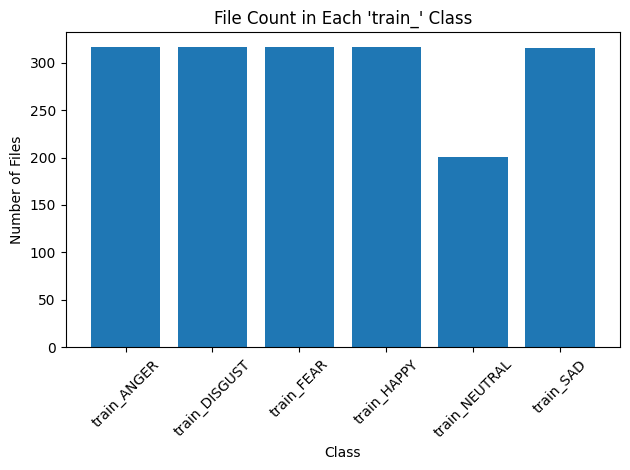

In [10]:
import os
import matplotlib.pyplot as plt

# Set the source folder path
source_folder = r"C:\Users\christ\Downloads\Amirthavarshini Sentimental analysis\dataset"

# Get a list of all subfolders in the source folder
subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir() and f.name.startswith("train_") and not f.name.endswith("checkpoints")]

# Initialize lists to store folder names and file counts
folder_names = []
file_counts = []

# Count the number of files in each subfolder
for folder in subfolders:
    folder_name = os.path.basename(folder)
    folder_names.append(folder_name)
    file_counts.append(len(os.listdir(folder)))

# Create a bar plot
plt.bar(folder_names, file_counts)
plt.xlabel("Class")
plt.ylabel("Number of Files")
plt.title("File Count in Each 'train_' Class")
plt.xticks(rotation=45)  # Rotate class labels for better visibility
plt.tight_layout()
plt.show()
